## Q1 Parabola

### Original Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_and_Y = np.load('./hw4-q1-parabola.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
print(X.shape, Y.shape)

(300,) (300,)


### 1.1 Parabola Estimation with L2 Norm 

Y = 51.07 + -16.06*X + 2.36*X^2


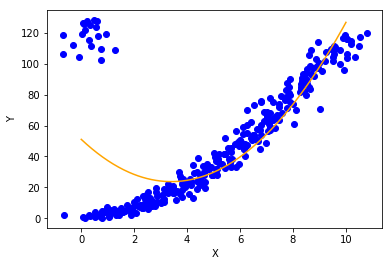

In [2]:
# plot the scatter graph of data and estimated parabola
# Assume Y = w0 + w1 * X + w2 * X^2 = (w0, w1, w2).(1, X, X^2) = W.X2
X2 = np.matrix(np.hstack((np.ones((len(X),1)),
                          X.reshape(-1,1), 
                          (X**2).reshape(-1,1))))  # X2 contains 1, X and X^2.
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*X^2'.format(w0, w1, w2))

X_line1 = np.linspace(0,10,300)
Y_line1 = w0 + w1 * X_line1 + w2 * (X_line1**2)
plt.scatter(X, Y, color='blue')
plt.plot(X_line1, Y_line1, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1.2 Parabola Estimation with L1 Norm (Gradient Descent)

In [3]:
# g'(W) for L1 Norm with formula from class.
def g_prime_W(X, Y, W):
    sign = np.sign(X.dot(W) - Y)
    sign = (sign.T.dot(X)).T
    return sign

(300, 3) (300, 1) (3, 1)
41383
1.068962
1.42814619333
1.02832914912


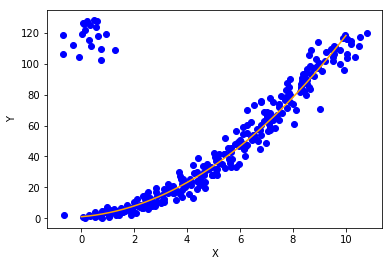

In [4]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
import numpy as np
W = np.matrix(np.zeros((3,1)))
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

X22 = np.matrix(np.hstack((np.ones((len(X),1)),
                          X.reshape(-1,1), 
                          (X**2).reshape(-1,1))))
Y = Y.reshape(-1, 1)

print(X22.shape, Y.shape, W.shape)

#while True:
for i in range(300000):
    grad = g_prime_W(X22, Y, W)
    W_new = W -  0.000001 * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1,w2 = np.array(W).reshape(-1)
print(w0)
print(w1)
print(w2)
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y, color='blue')
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1.3 Parabola Estimation with L1 and L2 Norm (Gradient Descent)

In [14]:
# g'(W) for L1+L2 Norm with formula from class.
def g_prime_W(X, Y, W, alpha):
    first  = 2*(X.dot(W) - Y)
    second = alpha * np.sign(X.dot(W) - Y)
    total = (first + second).T.dot(X).T
    return total

(300, 3) (300, 1) (3, 1)
88768
50.8453395384
-15.9763606285
2.35566367224


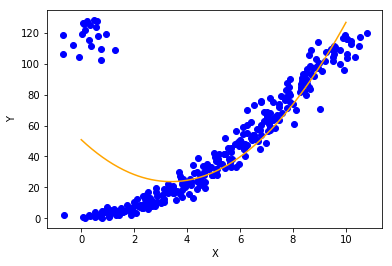

In [15]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
import numpy as np
W = np.matrix(np.zeros((3,1)))
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

X22 = np.matrix(np.hstack((np.ones((len(X),1)),
                          X.reshape(-1,1), 
                          (X**2).reshape(-1,1))))
Y = Y.reshape(-1, 1)

print(X22.shape, Y.shape, W.shape)

#while True:
for i in range(300000):
    grad = g_prime_W(X22, Y, W, 0.3)
    W_new = W -  0.000001 * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1,w2 = np.array(W).reshape(-1)
print(w0)
print(w1)
print(w2)
# alpha =0.5
X_line2 = np.linspace(0,10,300)
Y_line2 = w0 + w1 * X_line2 + w2 * (X_line2**2)
plt.scatter(X, Y, color='blue')
plt.plot(X_line2, Y_line2, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(300, 3) (300, 1) (3, 1)
88688
50.7653154466
-15.9459629455
2.35353227168


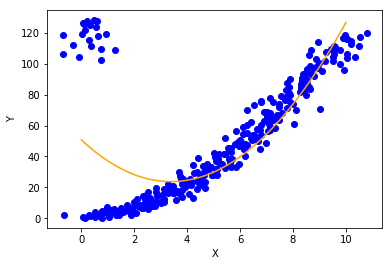

In [7]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
import numpy as np
W = np.matrix(np.zeros((3,1)))
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

X22 = np.matrix(np.hstack((np.ones((len(X),1)),
                          X.reshape(-1,1), 
                          (X**2).reshape(-1,1))))
Y = Y.reshape(-1, 1)

print(X22.shape, Y.shape, W.shape)

#while True:
for i in range(300000):
    grad = g_prime_W(X22, Y, W, 0.5)
    W_new = W -  0.000001 * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1,w2 = np.array(W).reshape(-1)
print(w0)
print(w1)
print(w2)
# alpha =0.5
X_line3 = np.linspace(0,10,300)
Y_line3 = w0 + w1 * X_line3 + w2 * (X_line3**2)
plt.scatter(X, Y, color='blue')
plt.plot(X_line3, Y_line3, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(300, 3) (300, 1) (3, 1)
88601
50.6852947962
-15.915566637
2.3514009847


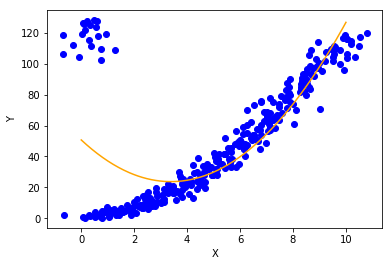

In [8]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
import numpy as np
W = np.matrix(np.zeros((3,1)))
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

X22 = np.matrix(np.hstack((np.ones((len(X),1)),
                          X.reshape(-1,1), 
                          (X**2).reshape(-1,1))))
Y = Y.reshape(-1, 1)

print(X22.shape, Y.shape, W.shape)

#while True:
for i in range(300000):
    grad = g_prime_W(X22, Y, W, 0.7)
    W_new = W -  0.000001 * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1,w2 = np.array(W).reshape(-1)
print(w0)
print(w1)
print(w2)
# alpha =0.7
X_line4 = np.linspace(0,10,300)
Y_line4 = w0 + w1 * X_line4 + w2 * (X_line4**2)
plt.scatter(X, Y, color='blue')
plt.plot(X_line4, Y_line4, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1.4 Comparison (Visualization)

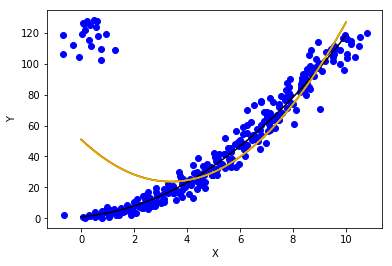

In [9]:
plt.scatter(X, Y, color='blue')
plt.plot(X_line1, Y_line1, color='red')
plt.plot(X_line, Y_line, color='black')
plt.plot(X_line2, Y_line2, color='yellow')
plt.plot(X_line3, Y_line3, color='green')
plt.plot(X_line4, Y_line4, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Q4 Logistic Regression

### Original Data

In [ ]:
import numpy as np
from tqdm import *
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# ---- set the figure size
plt.rcParams['figure.figsize'] = 8,8

# ---- load the data Q3_data.txt
file_path = 'Q4_data.txt'

data = np.genfromtxt(file_path,dtype="f8,f8,f8,f8,S20",
delimiter=',',names=['x1','x2','x3','x4','class'])

# ---- split the data points into the training set and test set
train_data = np.concatenate((data[15:50],data[65:]))
test_data = np.concatenate((data[:15],data[50:65]))
X_train = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in train_data])
X_test = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in test_data])
num_train = len(X_train)
num_test = len(X_test)

print("number of training data is "+str(num_train))
print("number of testing data is "+str(num_test))

# ---- convert the class names into categorical labels.
le = LabelEncoder()
le.fit(data['class'])
y_train = le.transform(train_data['class']).reshape(num_train,1)
y_test = le.transform(test_data['class']).reshape(num_test,1)

# ---- initialize the weights and bias to 0
# ---- we absorb the bias into the weights
w = np.zeros((5,1))
n_iter = 1000
alpha = 0.01
train_err = []

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### 4.2 Training with Training curve.

In [ ]:
# L'(W)
def l_prime_W(X, Y, W):
    return 2*X.T.dot(X).dot(W) - 2*X.T.dot(Y)

In [ ]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
import numpy as np
W = np.matrix(np.zeros((3,1)))
X = X_train  # Shape: (70,5)
Y = y_train  # Shape: (70,1)
#while True:
for i in range(300000):
    grad = g_prime_W(X, Y, W)
    W_new = W -  0.000001 * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
#w0 = np.array(W).reshape(-1)
#print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0))

### 4.3 Decision Boundary (Equation & Plot)

### 4.4 Test (Report Accuracy)